## Project Name: House Price Advance Regression Techniques
The main aim of this project is to predict the house price based on various features which we will discuss as we go ahead.

### All the life cycle of Data Science
1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

In [1]:
### Data Analysis phase
### Main aim is to understand more about the Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
color = sns.color_palette()

## Display all the features of the Dataset
pd.set_option('display.max_columns',None)

In [2]:
dataset = pd.read_csv('/home/saad/Downloads/train.csv')

In [3]:
## shape of the dataset
dataset.shape

(1460, 81)

In [4]:
## top five rows of dataset
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### In Data Analysis we will Analyze to fine out the below stuff
1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between Independent & Dependent Feature(Sale Price)

## Missing Values

In [5]:
# here we will check the percentage of NaN values in every feature
# step-1 create a list of features which has missing values
df = dataset.copy()
feature_with_nan = [feature for feature in df.columns if df[feature].isnull().sum()>0]

# step-2 print the features name and percentage of missing values
for feature in feature_with_nan:
    print(feature, np.round(df[feature].isnull().mean()*100,4),"% missing values")

LotFrontage 17.7397 % missing values
Alley 93.7671 % missing values
MasVnrType 0.5479 % missing values
MasVnrArea 0.5479 % missing values
BsmtQual 2.5342 % missing values
BsmtCond 2.5342 % missing values
BsmtExposure 2.6027 % missing values
BsmtFinType1 2.5342 % missing values
BsmtFinType2 2.6027 % missing values
Electrical 0.0685 % missing values
FireplaceQu 47.2603 % missing values
GarageType 5.5479 % missing values
GarageYrBlt 5.5479 % missing values
GarageFinish 5.5479 % missing values
GarageQual 5.5479 % missing values
GarageCond 5.5479 % missing values
PoolQC 99.5205 % missing values
Fence 80.7534 % missing values
MiscFeature 96.3014 % missing values


## Since there are many missing values so we need to find out the relationship between missing values and SalePrice
Let's plot some diagrams for this relationship

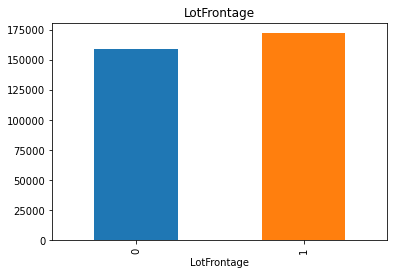

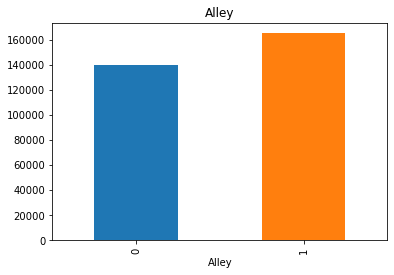

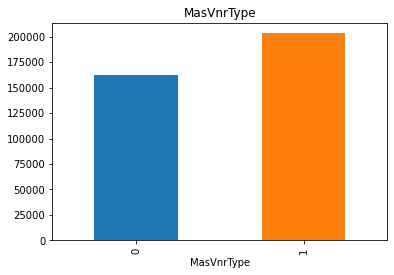

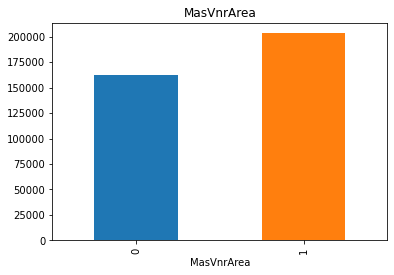

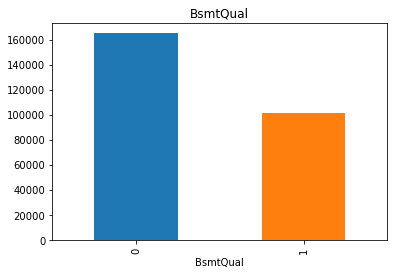

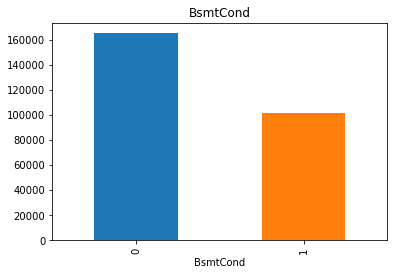

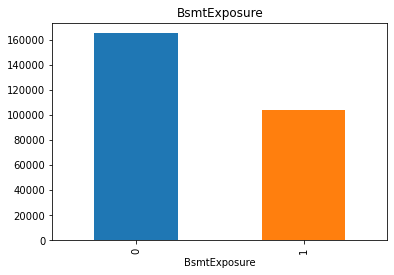

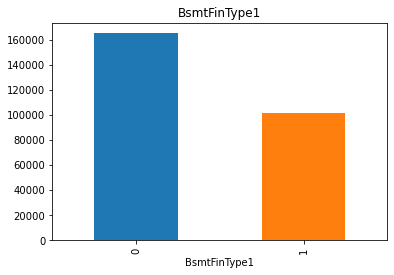

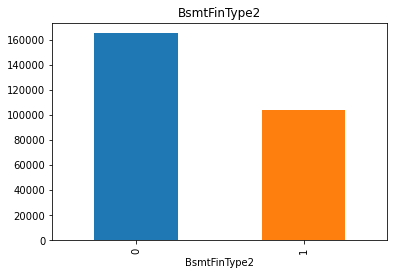

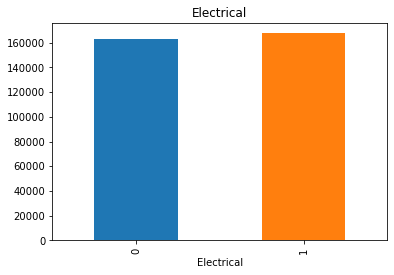

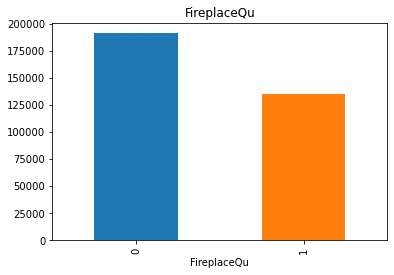

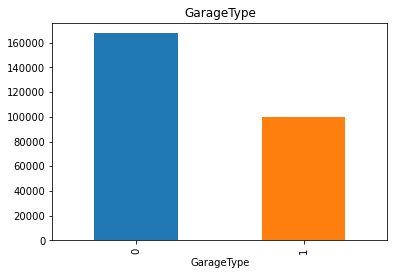

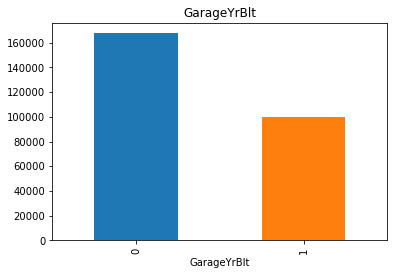

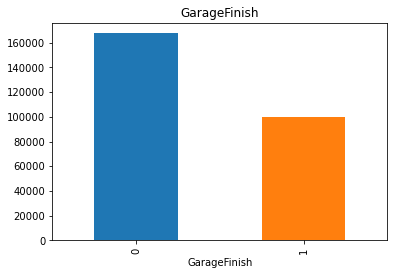

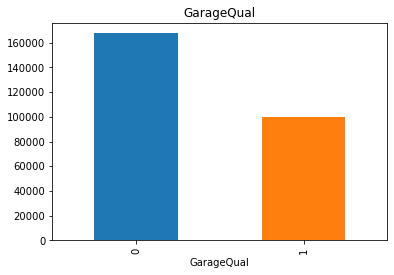

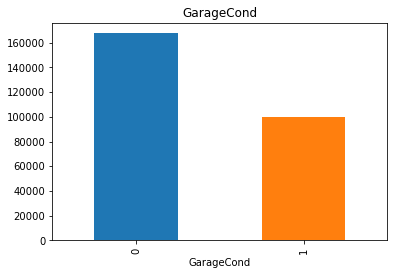

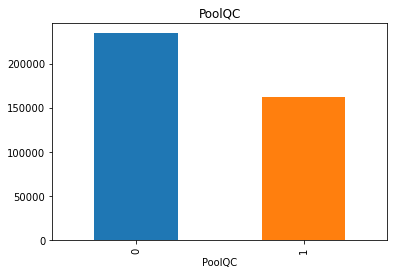

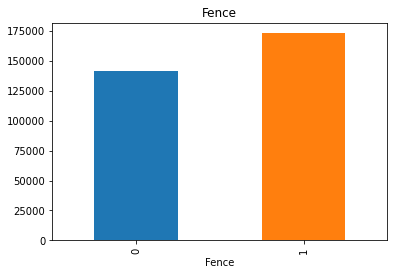

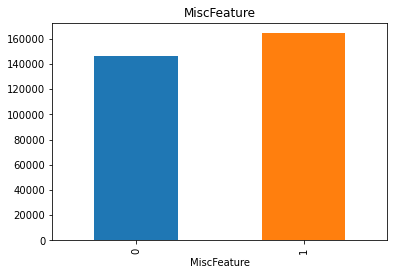

In [6]:
for feature in feature_with_nan:
    df = dataset.copy()
    # Let's make a variable that indicates the 1 if the variable is missing and zero otherwise
    df[feature] = np.where(df[feature].isnull(),1,0)
    
    # Let's calculate the mean SalePrice where the information is missing or present

    df.groupby(feature)['SalePrice'].median().plot.bar(color=color)
    #sns.barplot(x=feature, y='SalePrice', data=df, ci=False, estimator=np.median )
    plt.title(feature)
    plt.show()
    
    #Instead of :    data.groupby(feature)['SalePrice'].median().plot.bar()
    #Use:            sns.barplot(x=feature,y='SalePrice', data=df, ci=False, estimator=np.median)

Here with the relation between the missing values and dependent variables is clearely visible that the every feature which has nan value impact on the SalePrice either it becomes low or either it becomes high so we can't drop them. So we need to replace these nan values with something meaningful which we will do in the Feature Engineering section.

From the above dataset some of the features like 'Id' is not required

In [7]:
print("Id of Houses is: {}".format(len(df['Id'])))

Id of Houses is: 1460


## Numerical Variables

In [8]:
# List of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes!='O']
print("Number of Numerical Variables: ",len(numerical_features))

df[numerical_features].head()

Number of Numerical Variables:  39


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,1,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,1,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,1,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,1,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,1,0,12,2008,250000


### Temporal Variables (Eg: Datetime Variables)
In dataset i have 4 year variables. I have extract information from the Datetime variables like no of years or no of days. 
One example in this specific scenario can be difference in years between year the house was built to year the house was sold. I will perform this analysis in the feature engineering.

In [9]:
## List of features which contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [10]:
# Let's explore the content of these year variables
for feature in year_feature:
    print(feature, df[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

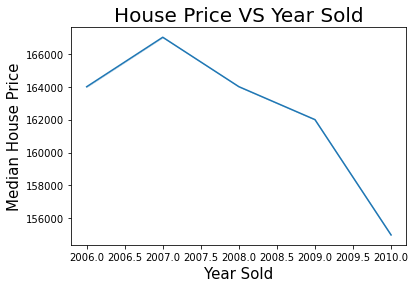

In [11]:
# Let's analyze the Temporal Datetime variables
# I'll check weather there is a relationship between year the house is sold and the output variable SalePrice
sns.lineplot(x='YrSold', y='SalePrice', data=df, estimator=np.median, ci=False)
#df.groupby(['YrSold'])['SalePrice'].median().plot()
plt.xlabel('Year Sold', size=15)
plt.ylabel('Median House Price', size=15)
plt.title('House Price VS Year Sold', size=20)
plt.show()

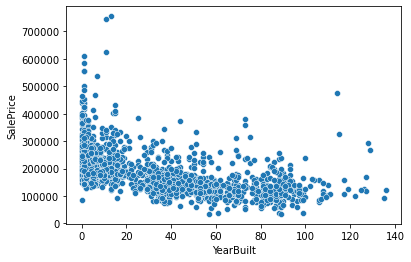

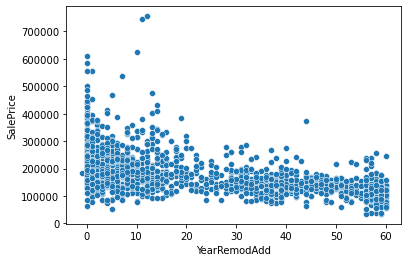

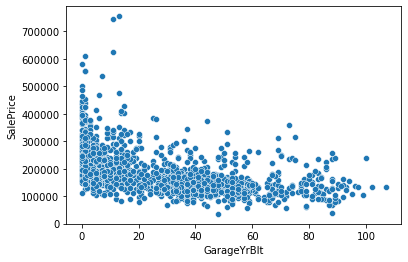

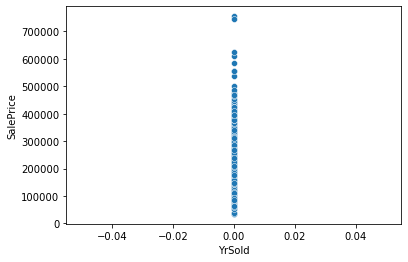

In [12]:
# Here i will try to compare the difference between all years features with SalePrice
for feature in year_feature:
    df = df.copy()
    # I will capture the difference between year variable and year the house was sold for
    df[feature] = df['YrSold']-df[feature]
    
    #plt.scatter(df[feature], df['SalePrice'])
    sns.scatterplot(x=feature, y='SalePrice', data=df)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

In [13]:
# Numerical Variables are usually of 2 types
# 2. Discrete Variables
# 1. Continuous Variables

### Discrete Variables
A discrete variable is a variable whose value is obtained by counting. Examples: number of students present. number of red marbles in a jar. number of heads when flipping three coins. students' grade level.

In [14]:
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables count:{} ".format(len(discrete_features)))

Discrete Variables count:18 


In [15]:
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscFeature',
 'MiscVal',
 'MoSold']

In [16]:
df[discrete_features].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscFeature,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,1,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,1,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,1,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,1,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,1,0,12


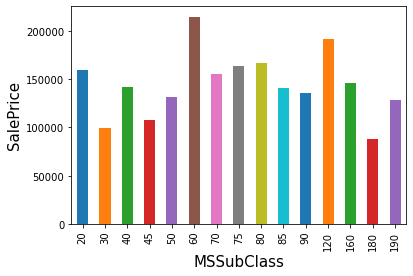

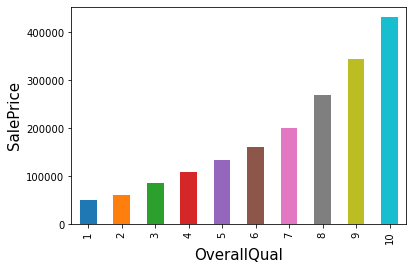

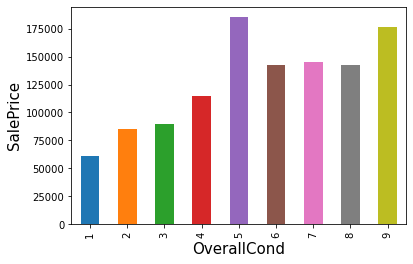

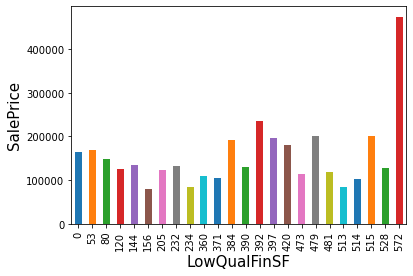

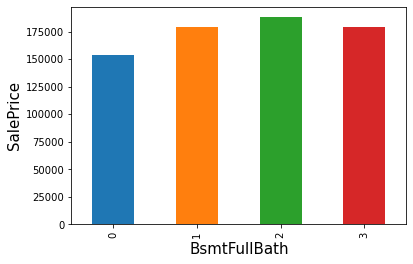

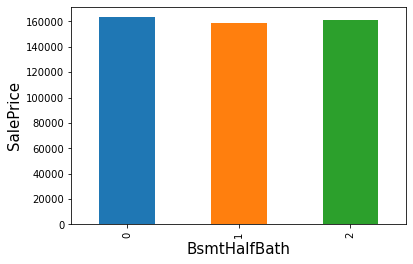

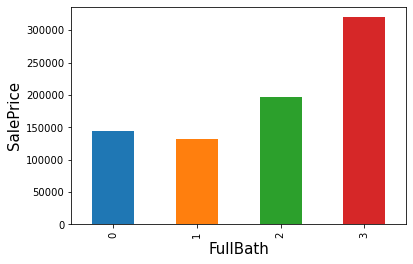

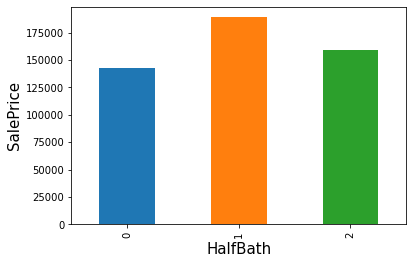

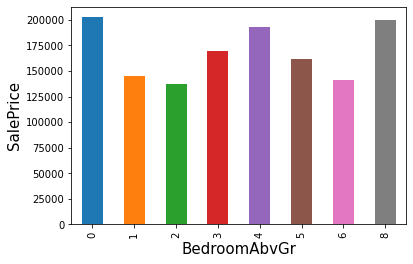

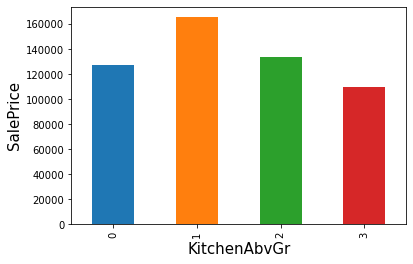

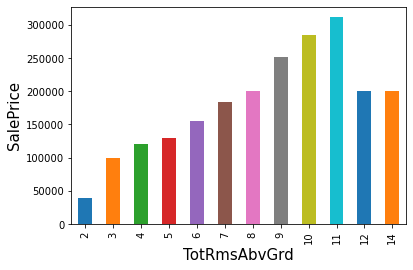

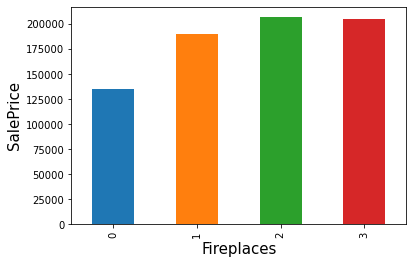

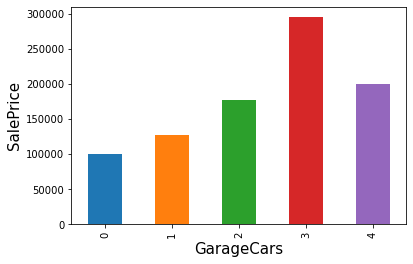

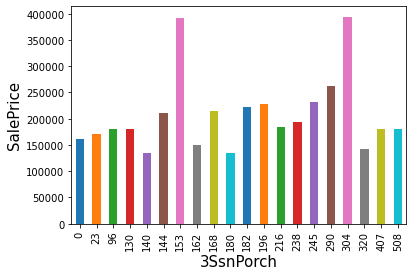

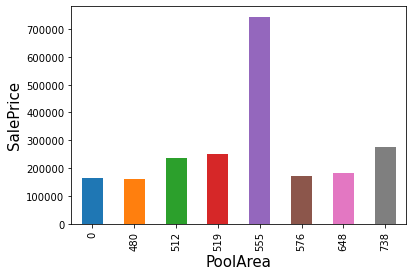

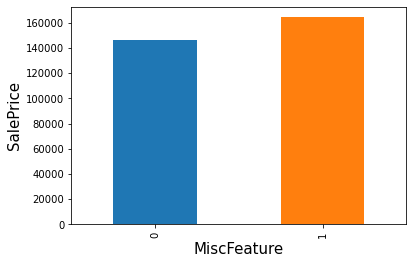

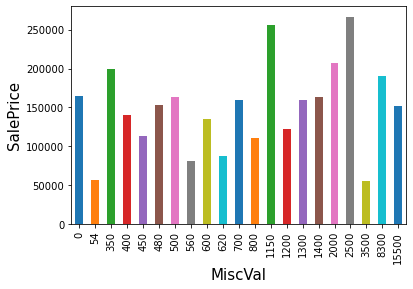

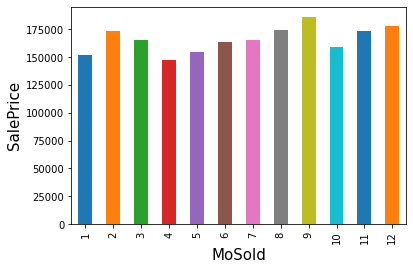

In [17]:
# Let's find the relationship between them and SalePrice
for feature in discrete_features:
    df = df.copy()
    
    df.groupby(feature)['SalePrice'].median().plot.bar(color=color)
    #sns.barplot(x=feature, y='SalePrice', data=df, saturation=1, errwidth=0, estimator=np.median)
    plt.xlabel(feature, size=15)
    plt.ylabel('SalePrice', size=15)
    plt.show()

### Continuouse Variables

In [18]:
continuouse_features = [feature for feature in numerical_features if feature not in discrete_features+year_feature+['Id']]
print("Continuous Features count {}".format(len(continuouse_features)))

Continuous Features count 16


In [19]:
continuouse_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

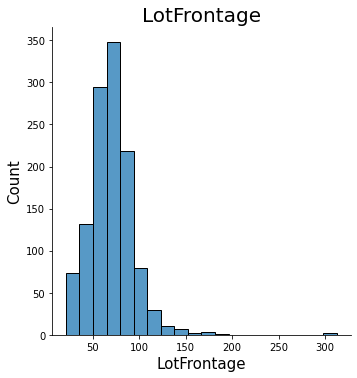

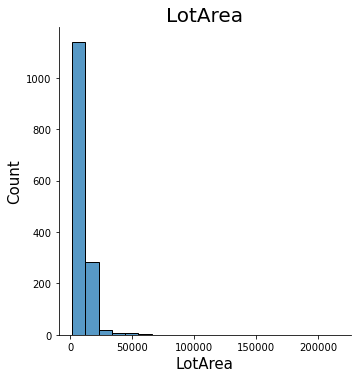

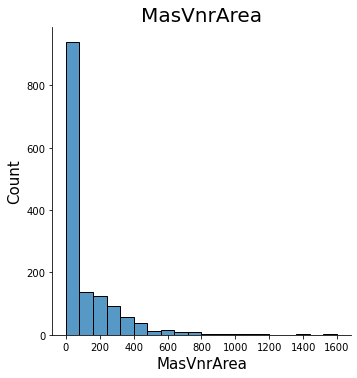

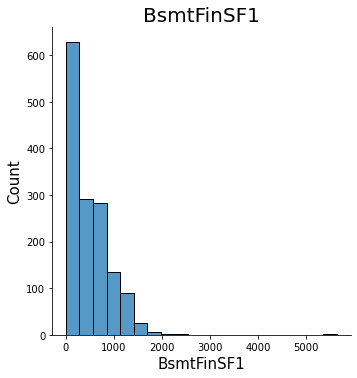

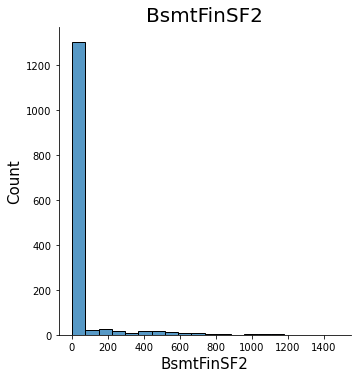

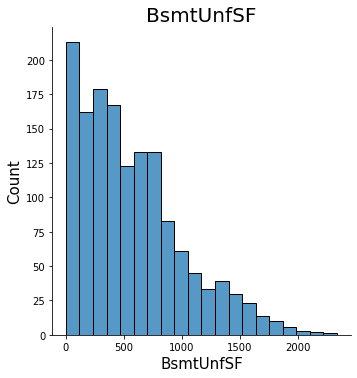

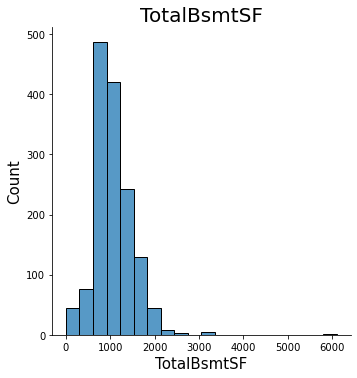

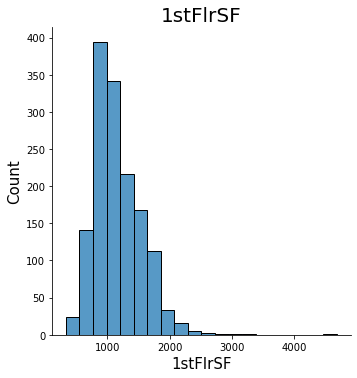

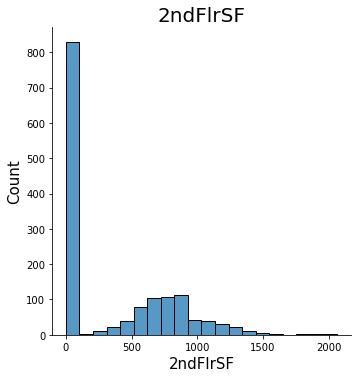

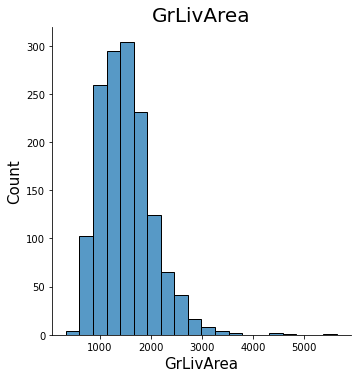

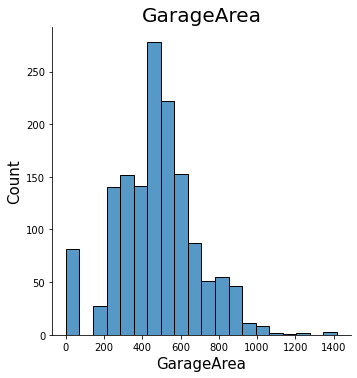

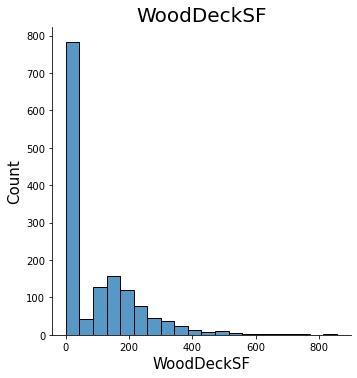

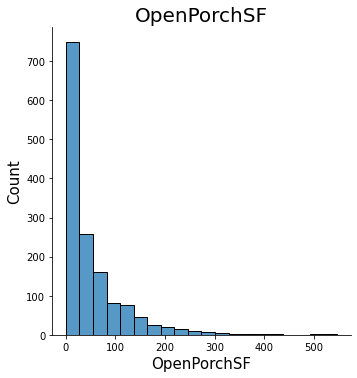

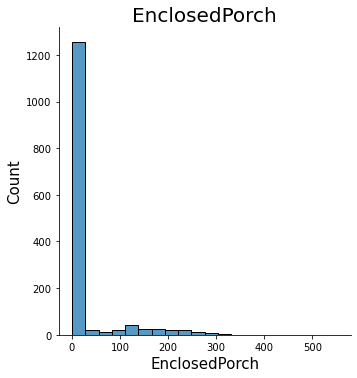

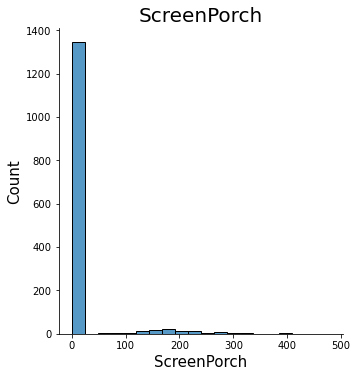

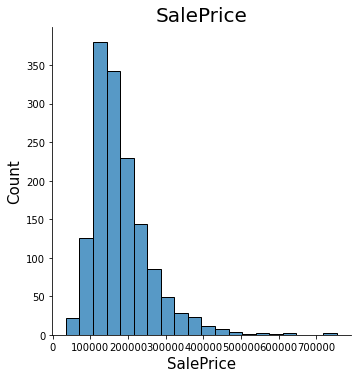

In [20]:
# for continuous variables we see distribution so i use histogram to see this
for feature in continuouse_features:
    df = df.copy()
    sns.displot(df[feature], kde=False, bins=20)
    #df[feature].hist()
    plt.xlabel(feature, size=15)
    plt.ylabel('Count', size=15)
    plt.title(feature, size=20)
    plt.show()

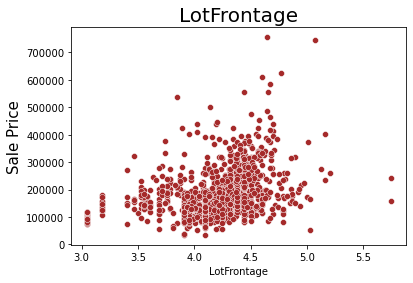

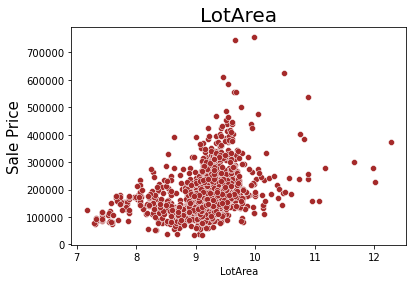

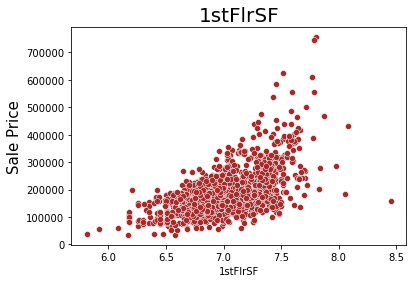

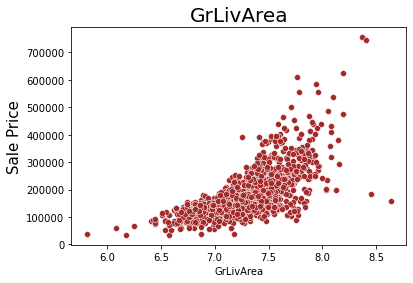

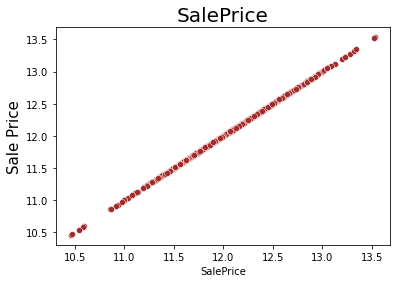

In [21]:
# I will be using Logarithmic Transformation
# For making tha continuouse_features into guassian distribution form


for feature in continuouse_features:
    df = df.copy()
    if 0 in df[feature].unique():
        pass
    else:
        df[feature] = np.log(df[feature])
        #df['SalePrice'] = np.log(df['SalePrice'])
        
        #plt.scatter(df[feature], df['SalePrice'])
        sns.scatterplot(x=feature, y='SalePrice', data=df, color='brown')
        #plt.xlabel(feature, size=15)
        plt.ylabel('Sale Price', size=15)
        plt.title(feature, size=20)
        plt.show()
    

In [22]:
# now we can see that there is a monotonic relationship as when the value is incresing saleprice also increasing 

### Outliers

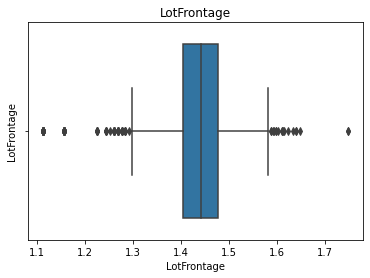

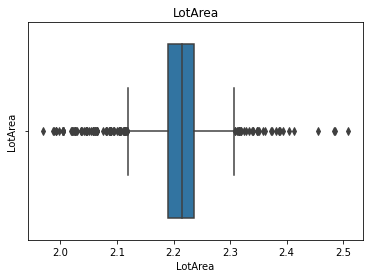

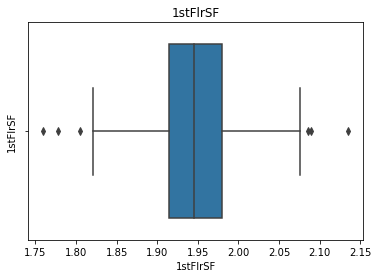

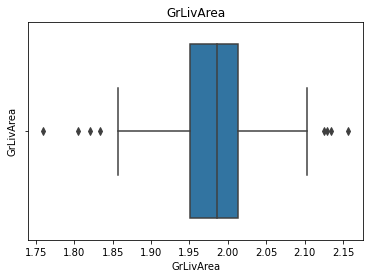

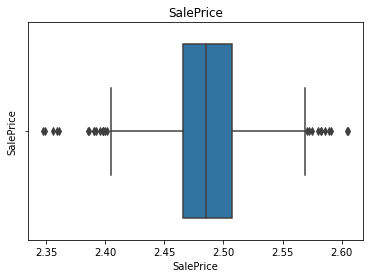

In [23]:
for feature in continuouse_features:
    if 0 in df[feature].unique():
        pass
    else:
        df[feature] = np.log(df[feature])
        sns.boxplot(df[feature])
        #plt.boxplot(df[feature])
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()